### Module import

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline



### 1. Image Calibration

#### Created a user-defined function for distorted and undistorted images

In [132]:
def image_calib(nx, ny, i):
    '''
    nx is the number of the intersection of chess in x direction 
    ny is the number of the intersection of chess in y direction
    i is the ith image to be calibrated
    '''
    Path = './camera_cal/'
    
    objpoints = [] #3D dimension object, where z is the depth, index of chess board intersection, like (0,0,0), (1,0,0)...()
    imgpoints = [] #this is 2D image object, the coordinates of the distorted images for each index points
    
    objp = np.zeros((ny*nx,3),np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    cal1 = Path + f'calibration{i}.jpg'
    
    image = cv2.imread(cal1)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret1, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret1 == True:
        objpoints.append(objp)
    # Draw and display the corners
        img = cv2.drawChessboardCorners(image, (nx, ny), corners, ret1)
        imgpoints.append(corners)
        fig = plt.figure(figsize=(15,10))
        fig.add_subplot(131)
        plt.title(f'Distorted image{i}')
        plt.imshow(img)
    else:
        print('Error: Corners NOT Found!!')
        return ret
        
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    fig.add_subplot(132)
    plt.title('Undistorted image')
    plt.imshow(undist)
    
    #cv2.drawChessboardCorners(undist, (nx, ny), corners, ret1)
    offset = 75 # offset for dst points
    
    # x coordinate first, then y
    img_size = (gray.shape[1], gray.shape[0])
    
    
    # top left-> top right->bottom right->bottom left
    src = np.float32([corners[0], corners[nx-2], corners[-2], corners[-nx]])
    
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist, M, img_size)
    fig.add_subplot(133)
    plt.title('warped image')
    plt.imshow(warped)
   # return img, mtx,dist

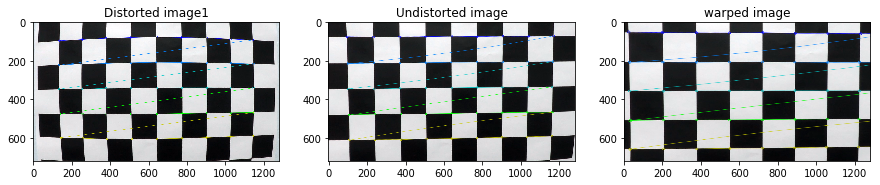

In [133]:
## The frist image has ny = 5, so display it seperately. Other calibration images have nx =9, and ny =6. 
image_calib(9,5,1)

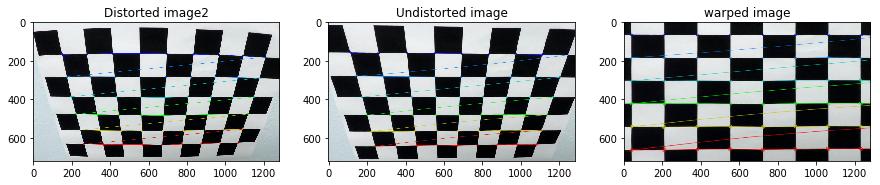

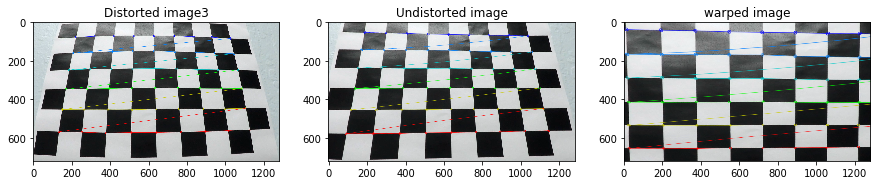

In [134]:
for i in range(2,4):
    image_calib(9,6,i)

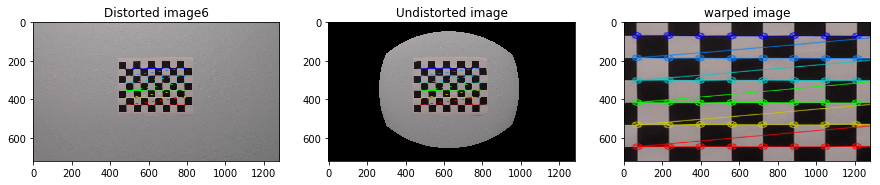

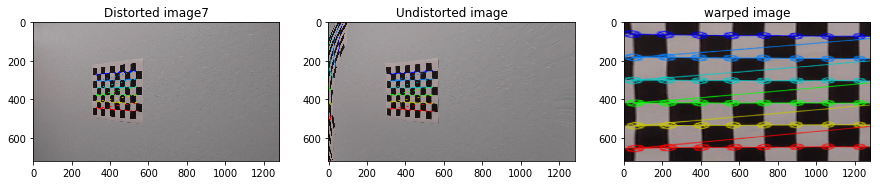

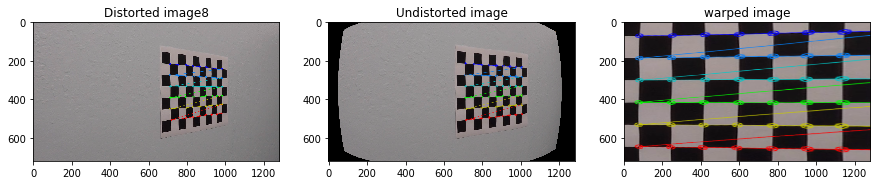

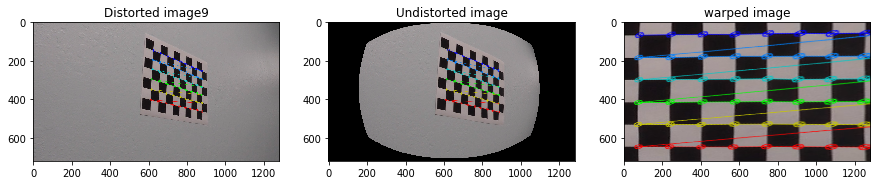

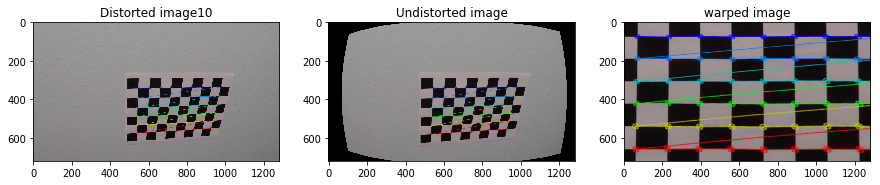

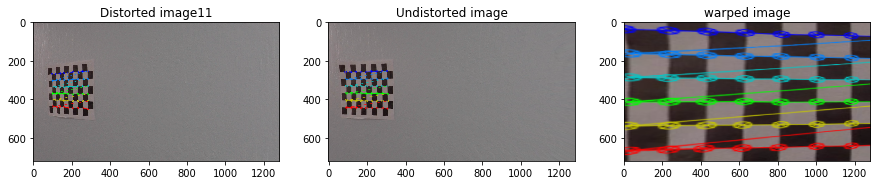

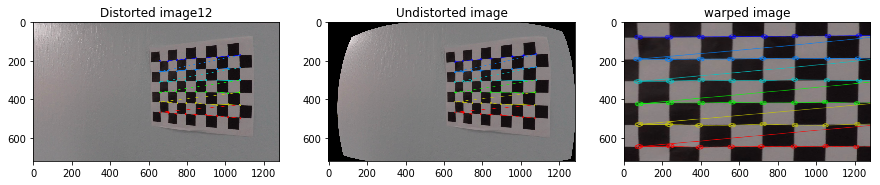

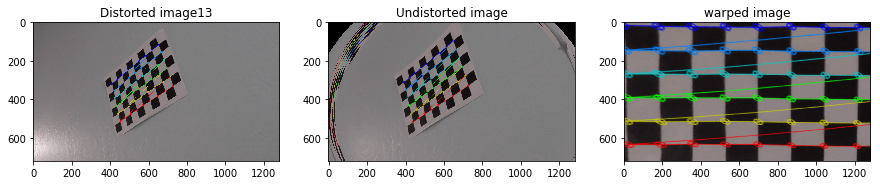

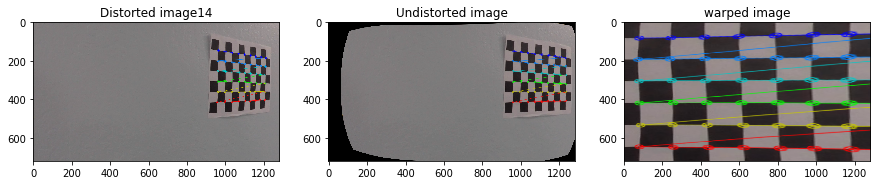

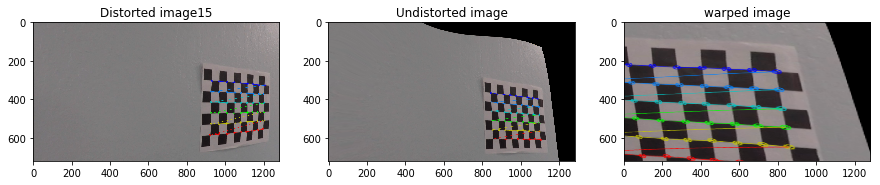

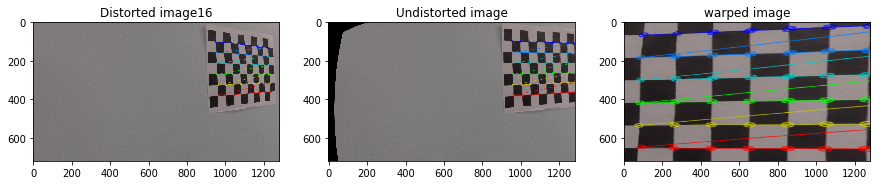

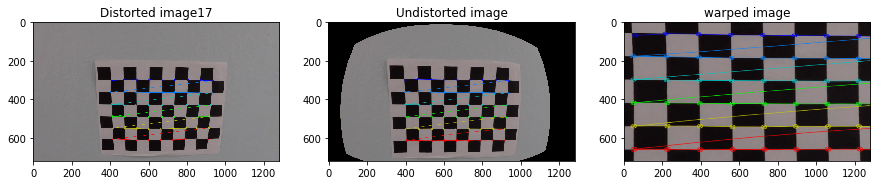

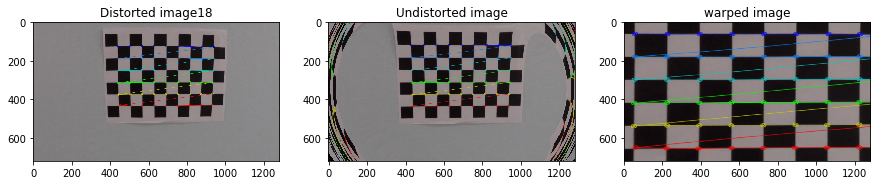

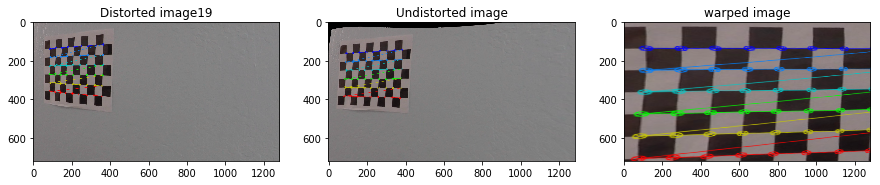

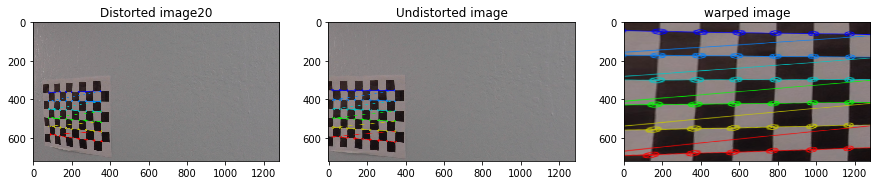

In [135]:
for i in range(6,21):
    image_calib(9,6,i)

(45, 3)
(45, 1, 2)


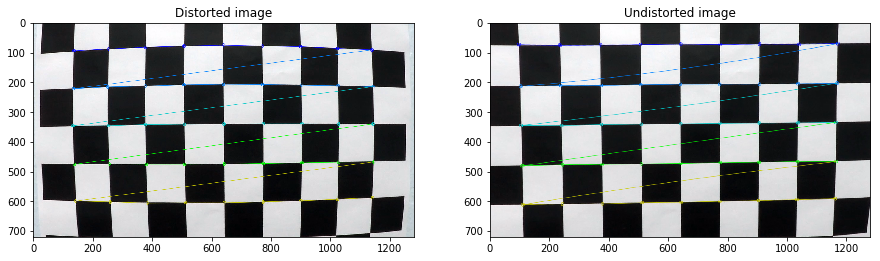

In [57]:
Path = './camera_cal/'
nx = 9  
ny = 5 

objpoints = [] #3D dimension object, where z is the depth, index of chess board intersection, like (0,0,0), (1,0,0)...()
imgpoints = [] #this is 2D image object, the coordinates of the distorted images for each index points

## I spent a lot of time in understanding the dimensions of 3D object points and 2D image points
objp = np.zeros((5*9,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:5].T.reshape(-1,2)
cal1 = Path + 'calibration1.jpg'

# Make a list of calibration images
img = cv2.imread(cal1)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
print(objp.shape)
print(corners.shape)
# If found, draw corners
if ret == True:
    objpoints.append(objp)
    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    imgpoints.append(corners)
    fig = plt.figure(figsize=(15,15))
    fig.add_subplot(121)
    plt.title('Distorted image')
    plt.imshow(img)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
fig.add_subplot(122)
plt.title('Undistorted image')
plt.imshow(dst)

In [142]:
a = np.arange(12).reshape(3,4)
print(a)
b = np.zeros_like(a)
b[(a > 3) & (a < 10)] = 1
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0 0 0 0]
 [1 1 1 1]
 [1 1 0 0]]


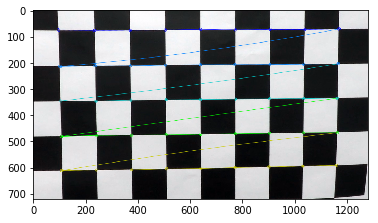

In [12]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)